<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
df_std = df.iloc[6500000:,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
6500000,2.0,11330521.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,202001,1,40000000.0,1,82000.0,3831791.31,PEDRAZA,75,5.155400e+05
6500001,2.0,12562229.29,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,B,M,...,3,201904,1,40000000.0,4,0.0,3831791.31,PEDRAZA,74,3.327700e+05
6500002,2.0,11555331.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,201909,1,40000000.0,9,223000.0,3831791.31,PEDRAZA,74,5.994400e+05
6500003,2.0,9371320.00,3622610.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,B,M,...,12,202004,1,19500000.0,4,5948000.0,0.00,PEDRAZA,42,4.600000e+03
6500004,2.0,6519869.00,2941320.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,C,M,...,10,201911,0,0.0,11,27617000.0,0.00,PEDRAZA,41,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.00,PUERRES,47,7.431714e+05
9527189,3.0,26913722.00,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.00,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.00,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.00,MURILLO,47,7.853290e+05
9527191,2.0,14481371.00,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.00,PUERRES,42,1.029045e+06


## One-Hot Encoding

In [ ]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

In [ ]:
df_onehot

In [ ]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

## Best Variables

In [ ]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:31]

In [11]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
                     'gasto_familiar']

In [12]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,ult_actual,tiene_cred_hipo_2,tiene_cred_hipo_1,cant_oblig_tot_sf,gasto_familiar
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,44,1,20190612,0,0,3,5.155400e+05
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,44,1,20190112,0,0,3,3.327700e+05
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,44,1,20190612,0,0,3,5.994400e+05
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,55,1,20200119,0,0,12,4.600000e+03
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,55,1,20190308,0,0,10,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,44,1,20201010,1,1,2,7.431714e+05
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,47,2,20201003,1,1,12,8.502165e+05
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,46,1,20200616,1,1,17,7.853290e+05
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,64,1,20200423,1,1,18,1.029045e+06


## Normalization

In [13]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,3027193.0,0.30,0.14,0.0,0.20,0.20,0.40,1.0
1,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,3027193.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,3027193.0,0.54,0.17,0.0,0.56,0.56,0.56,1.0
4,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,3027193.0,0.61,0.36,0.0,0.29,0.57,1.00,1.0
7,3027193.0,0.48,0.50,0.0,0.00,0.00,1.00,1.0
8,3027193.0,0.46,0.46,0.0,0.00,0.50,1.00,1.0
9,3027193.0,0.38,0.24,0.0,0.40,0.40,0.40,1.0


In [14]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [15]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 16)
(281666,)
(2745527,)


## Train_Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1713837,0.2,0.000630,0.008660,0.555556,0.0,0.0,0.285714,0.0,0.00,0.4,0.551282,0.028571,0.999960,0.0,0.0,0.047619
1466666,0.2,0.000408,0.004991,0.555556,0.0,0.0,0.285714,0.0,0.50,0.4,0.692308,0.028571,0.999484,0.0,0.0,0.057143
221907,0.2,0.000424,0.005757,0.555556,0.0,0.0,0.142857,0.0,0.00,0.0,0.012821,0.028571,0.998994,0.0,0.0,0.066667
797837,0.2,0.000579,0.000000,0.555556,0.0,0.0,0.857143,0.0,0.00,0.4,0.358974,0.028571,0.999495,0.0,0.0,0.038095
820873,0.2,0.000137,0.002033,0.555556,0.0,0.0,0.571429,1.0,0.75,0.6,0.551282,0.028571,0.999491,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393642,0.4,0.001149,0.000000,0.555556,0.0,0.0,0.857143,1.0,0.75,0.6,0.551282,0.028571,0.999500,0.0,0.0,0.038095
1312107,0.2,0.000655,0.002911,0.555556,0.0,0.0,0.857143,0.0,1.00,0.0,0.551282,0.028571,0.999470,0.0,0.0,0.028571
479400,0.4,0.000948,0.000000,0.555556,0.0,0.0,1.000000,1.0,0.00,0.8,0.551282,0.028571,0.999000,0.0,0.0,0.009524
315422,0.2,0.000282,0.000000,0.555556,0.0,0.0,0.571429,0.0,1.00,0.4,0.512821,0.028571,0.999019,0.0,0.0,0.000000


In [17]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [18]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(32, input_dim=31, kernel_initializer='normal',activation='linear'))
model.add(Dense(64, kernel_initializer='normal',activation='linear'))
model.add(Dense(30, kernel_initializer='normal',activation='linear'))
model.add(Dense(15, kernel_initializer='normal',activation='linear'))
model.add(Dense(7, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [21]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [22]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 20s 758us/step - loss: 8.5775e-06 - mean_absolute_percentage_error: 5.3978
loss :  8.577489097660873e-06
mean_absolute_percentage_error :  5.397817134857178


## Submission

In [23]:
y_hat = model.predict(x_val)
y_hat

array([[0.01824781],
       [0.01697011],
       [0.01815755],
       ...,
       [0.01853312],
       [0.018279  ],
       [0.01759109]], dtype=float32)

In [24]:
y_val

array([0.01741509, 0.01725528, 0.01728622, ..., 0.01726373, 0.01768091,
       0.01747893])

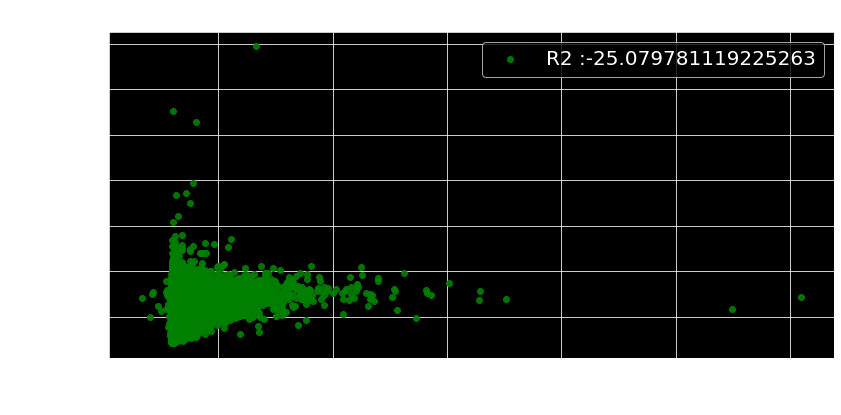

In [25]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [26]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.018248
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.016970
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.018158
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.016958
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.018203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.017439
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.019088
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.018533
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.018279


In [27]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.360221e+06
1         6.138029e+05
2         1.307492e+06
3         6.068551e+05
4         1.333836e+06
              ...     
281661    8.876589e+05
281662    1.850778e+06
281663    1.526901e+06
281664    1.378446e+06
281665    9.765754e+05
Name: 16, Length: 281666, dtype: float64

In [28]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.360221e+06
1,12598#201902,6.138029e+05
2,23697#201902,1.307492e+06
3,23768#201902,6.068551e+05
4,7174#201902,1.333836e+06
...,...,...
281661,8596193#202011,8.876589e+05
281662,8616083#202011,1.850778e+06
281663,8670207#202011,1.526901e+06
281664,8677655#202011,1.378446e+06


In [29]:
n = 70
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN70.csv'

In [30]:
np.mean(sub['gasto_familiar'])

932313.188279674

In [31]:
sub.to_csv(sub_name, index=False)

# Test 1

In [32]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

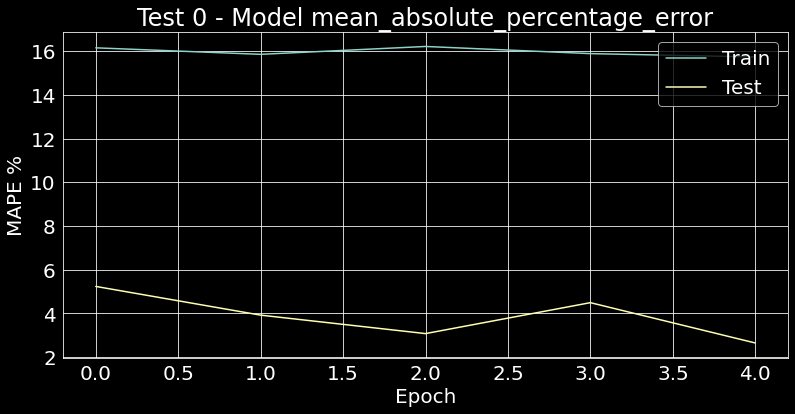

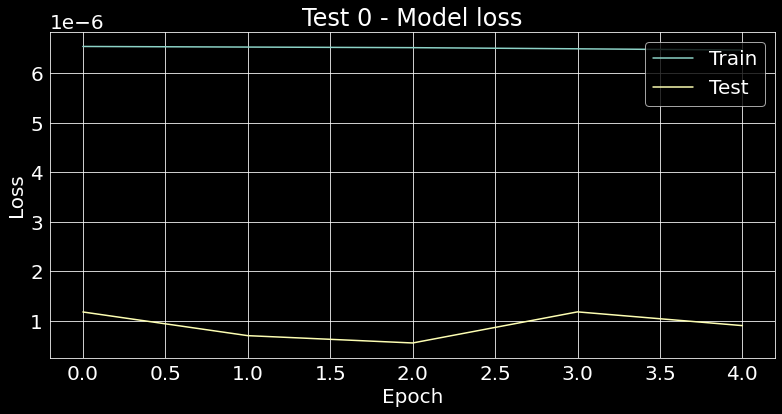

In [33]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 0 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 0 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [34]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 20s 758us/step - loss: 8.4632e-06 - mean_absolute_percentage_error: 5.6136
loss :  8.463187441520859e-06
mean_absolute_percentage_error :  5.613575458526611


# Submission

In [35]:
y_hat = model.predict(x_val)
y_hat

array([[0.01781904],
       [0.01706418],
       [0.01778911],
       ...,
       [0.01834139],
       [0.01830718],
       [0.01757991]], dtype=float32)

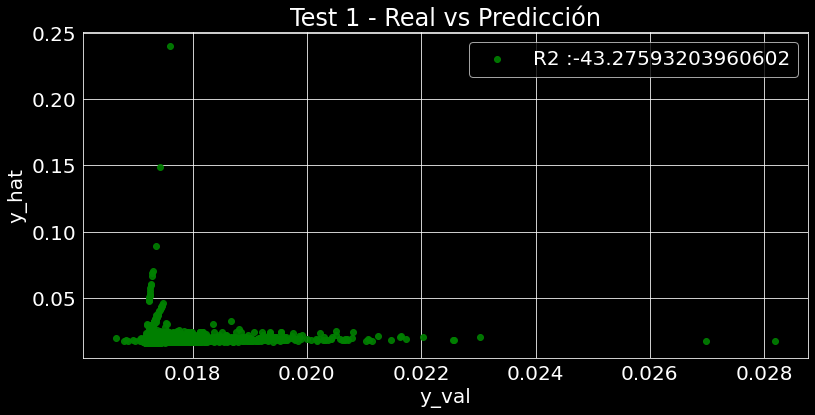

In [36]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [37]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.017819
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.017064
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.017789
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.017063
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.017959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.017291
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.019185
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.018341
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.018307


In [38]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.109738e+06
1         6.687563e+05
2         1.092254e+06
3         6.678422e+05
4         1.191639e+06
              ...     
281661    8.013627e+05
281662    1.907734e+06
281663    1.414894e+06
281664    1.394904e+06
281665    9.700400e+05
Name: 16, Length: 281666, dtype: float64

In [39]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.109738e+06
1,12598#201902,6.687563e+05
2,23697#201902,1.092254e+06
3,23768#201902,6.678422e+05
4,7174#201902,1.191639e+06
...,...,...
281661,8596193#202011,8.013627e+05
281662,8616083#202011,1.907734e+06
281663,8670207#202011,1.414894e+06
281664,8677655#202011,1.394904e+06


In [40]:
n = 71
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN71.csv'

In [41]:
np.mean(sub['gasto_familiar'])

913008.6267657977

In [42]:
sub.to_csv(sub_name, index=False)

# Test 2

In [43]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


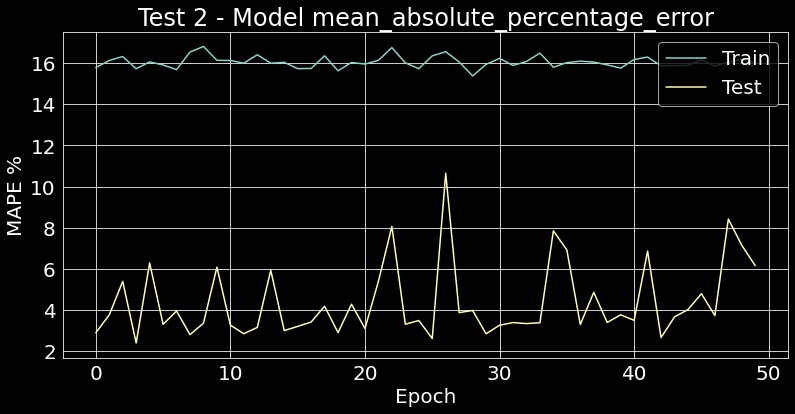

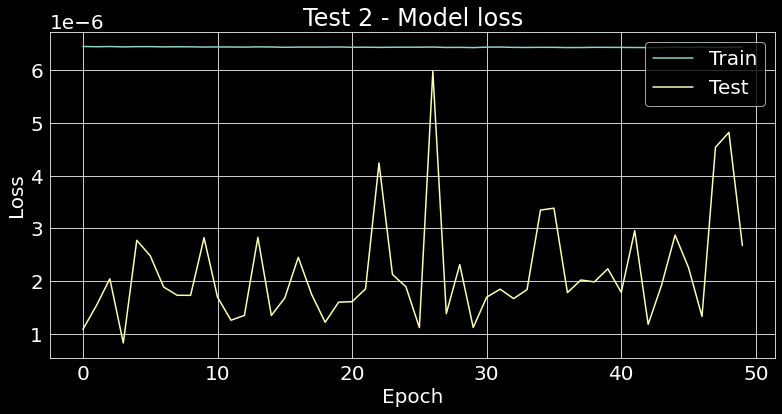

In [44]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [45]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 20s 758us/step - loss: 8.4482e-06 - mean_absolute_percentage_error: 5.8889
loss :  8.448217158729676e-06
mean_absolute_percentage_error :  5.888890266418457


# Submission

In [46]:
y_hat = model.predict(x_val)
y_hat

array([[0.01870722],
       [0.01783062],
       [0.0186984 ],
       ...,
       [0.01924328],
       [0.01912499],
       [0.01825562]], dtype=float32)

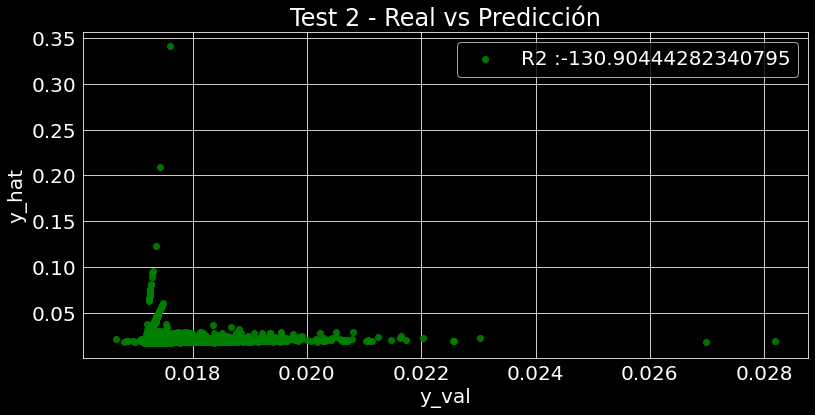

In [47]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [48]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.018707
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.017831
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.018698
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.017919
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.018671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.018013
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.020304
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.019243
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.019125


In [49]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.628608e+06
1         1.116506e+06
2         1.623453e+06
3         1.167968e+06
4         1.607621e+06
              ...     
281661    1.222843e+06
281662    2.561384e+06
281663    1.941766e+06
281664    1.872667e+06
281665    1.364785e+06
Name: 16, Length: 281666, dtype: float64

In [50]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.628608e+06
1,12598#201902,1.116506e+06
2,23697#201902,1.623453e+06
3,23768#201902,1.167968e+06
4,7174#201902,1.607621e+06
...,...,...
281661,8596193#202011,1.222843e+06
281662,8616083#202011,2.561384e+06
281663,8670207#202011,1.941766e+06
281664,8677655#202011,1.872667e+06


In [51]:
n = 72
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN72.csv'

In [52]:
np.mean(sub['gasto_familiar'])

1396374.1709940864

In [53]:
sub.to_csv(sub_name, index=False)

# Test 3

In [54]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


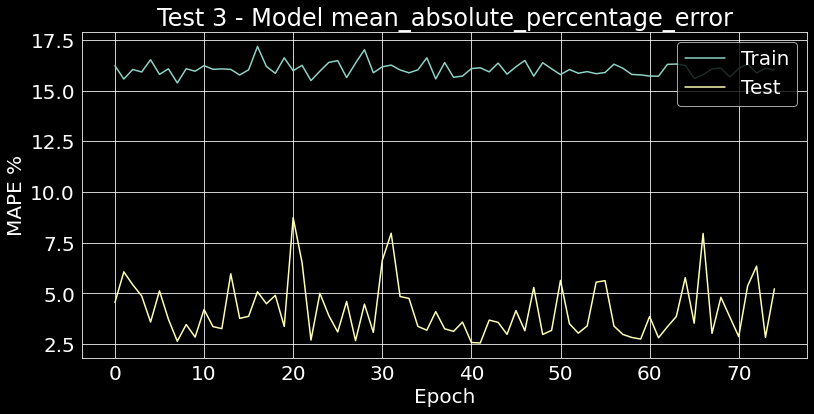

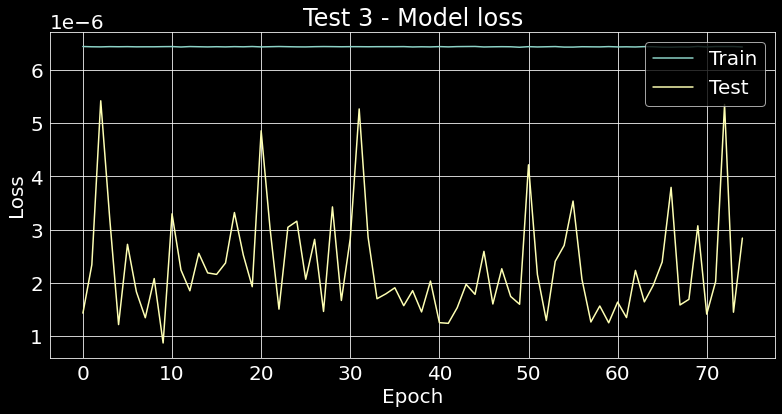

In [55]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [56]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

25740/25740 [==============================] - 19s 738us/step - loss: 8.4845e-06 - mean_absolute_percentage_error: 6.2616s - loss: 8.4853e-06 - mean_absolute_percentage_error: 6.26
loss :  8.48451873025624e-06
mean_absolute_percentage_error :  6.2615742683410645


## Submission

In [57]:
y_hat = model.predict(x_val)
y_hat

array([[0.01855944],
       [0.01754216],
       [0.01855088],
       ...,
       [0.01914828],
       [0.01910683],
       [0.01811641]], dtype=float32)

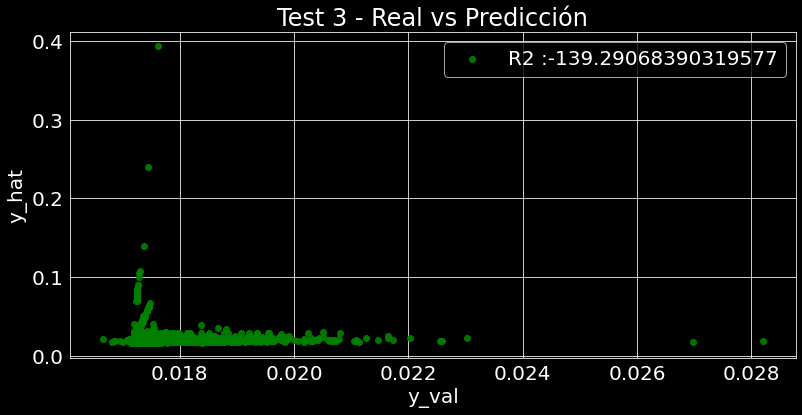

In [58]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [59]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.018559
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.017542
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.018551
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.017664
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.018574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.017845
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.020333
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.019148
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.019107


In [60]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.542272e+06
1         9.479855e+05
2         1.537273e+06
3         1.019114e+06
4         1.551046e+06
              ...     
281661    1.124997e+06
281662    2.578597e+06
281663    1.886271e+06
281664    1.862054e+06
281665    1.283459e+06
Name: 16, Length: 281666, dtype: float64

In [61]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.542272e+06
1,12598#201902,9.479855e+05
2,23697#201902,1.537273e+06
3,23768#201902,1.019114e+06
4,7174#201902,1.551046e+06
...,...,...
281661,8596193#202011,1.124997e+06
281662,8616083#202011,2.578597e+06
281663,8670207#202011,1.886271e+06
281664,8677655#202011,1.862054e+06


In [62]:
n = 67
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN67.csv'

In [63]:
np.mean(sub['gasto_familiar'])

1300220.368299171

In [64]:
sub.to_csv(sub_name, index=False)

# Test 4

In [65]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


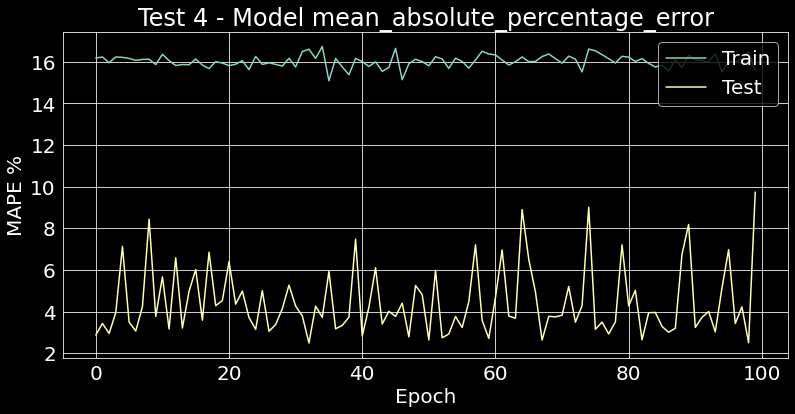

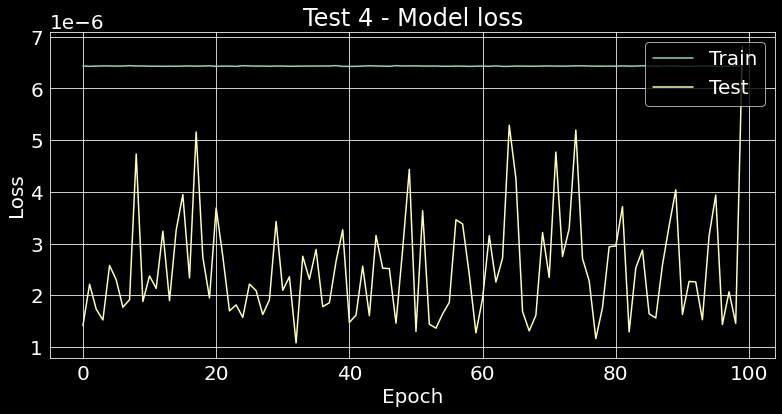

In [66]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [67]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 19s 742us/step - loss: 9.4346e-06 - mean_absolute_percentage_error: 9.0527
loss :  9.434626008442137e-06
mean_absolute_percentage_error :  9.052684783935547


## Submission

In [68]:
y_hat = model.predict(x_val)
y_hat

array([[0.01939266],
       [0.0180495 ],
       [0.01936691],
       ...,
       [0.02036105],
       [0.02033824],
       [0.01901764]], dtype=float32)

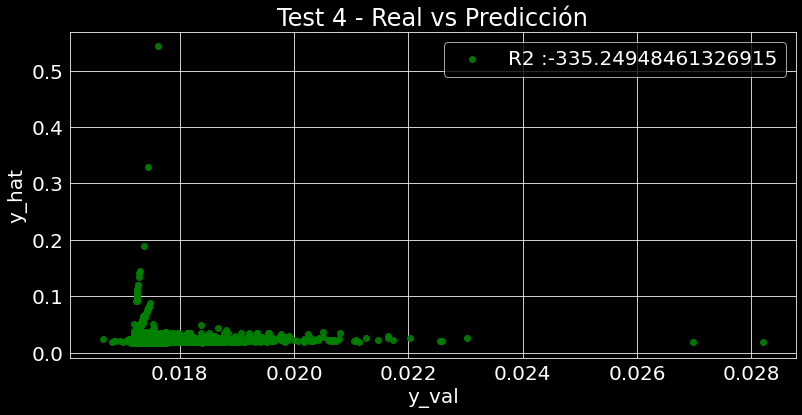

In [69]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [70]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.019393
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.018049
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.019367
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.018152
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.019664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.018628
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.022001
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.020361
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.020338


In [71]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         2.029036e+06
1         1.244372e+06
2         2.013991e+06
3         1.304268e+06
4         2.187594e+06
              ...     
281661    1.582230e+06
281662    3.552747e+06
281663    2.594763e+06
281664    2.581436e+06
281665    1.809954e+06
Name: 16, Length: 281666, dtype: float64

In [72]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,2.029036e+06
1,12598#201902,1.244372e+06
2,23697#201902,2.013991e+06
3,23768#201902,1.304268e+06
4,7174#201902,2.187594e+06
...,...,...
281661,8596193#202011,1.582230e+06
281662,8616083#202011,3.552747e+06
281663,8670207#202011,2.594763e+06
281664,8677655#202011,2.581436e+06


In [73]:
n = 74
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN74.csv'

In [74]:
np.mean(sub['gasto_familiar'])

1759088.6529555463

In [75]:
sub.to_csv(sub_name, index=False)

# Test 5

In [76]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



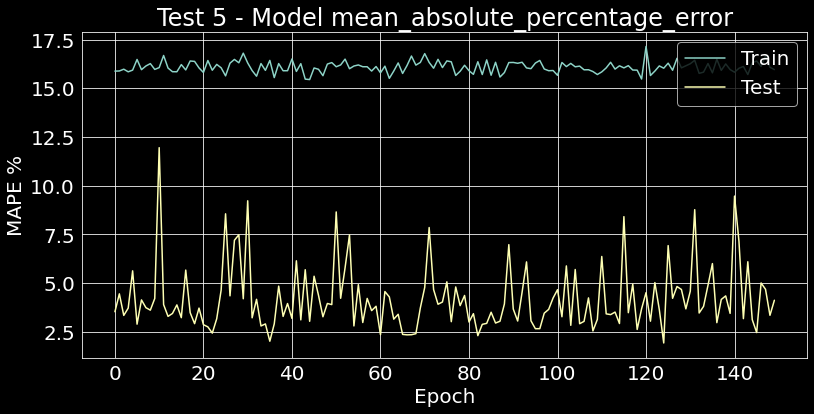

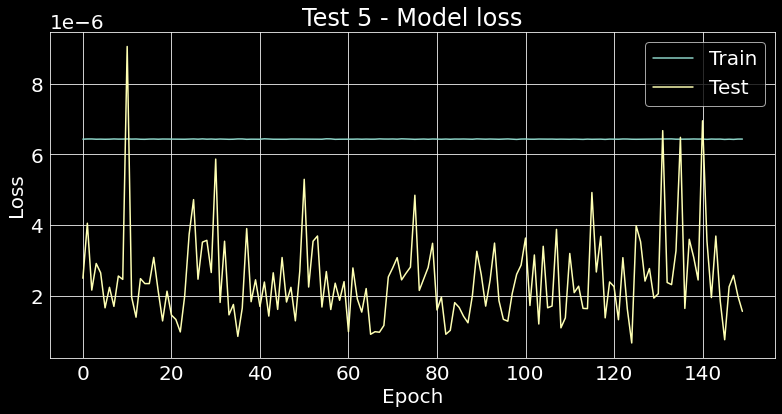

In [77]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [78]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 19s 740us/step - loss: 8.5391e-06 - mean_absolute_percentage_error: 6.4653
loss :  8.539124792150687e-06
mean_absolute_percentage_error :  6.465304374694824


# Submission

In [79]:
y_hat = model.predict(x_val)
y_hat

array([[0.01821561],
       [0.01752253],
       [0.01820217],
       ...,
       [0.01873665],
       [0.01872933],
       [0.01801888]], dtype=float32)

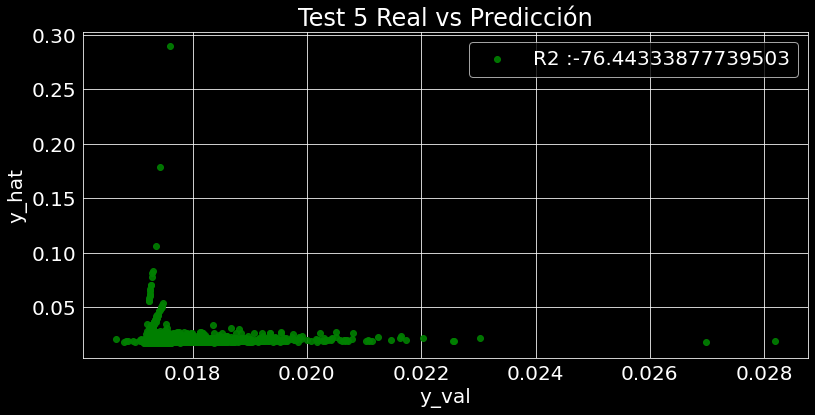

In [80]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [81]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.018216
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.017523
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.018202
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.017570
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.018354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.017759
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.019562
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.018737
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.018729


In [82]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.341411e+06
1         9.365209e+05
2         1.333560e+06
3         9.644393e+05
4         1.422070e+06
              ...     
281661    1.074647e+06
281662    2.128041e+06
281663    1.645802e+06
281664    1.641522e+06
281665    1.226485e+06
Name: 16, Length: 281666, dtype: float64

In [83]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.341411e+06
1,12598#201902,9.365209e+05
2,23697#201902,1.333560e+06
3,23768#201902,9.644393e+05
4,7174#201902,1.422070e+06
...,...,...
281661,8596193#202011,1.074647e+06
281662,8616083#202011,2.128041e+06
281663,8670207#202011,1.645802e+06
281664,8677655#202011,1.641522e+06


In [84]:
n = 75
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN75.csv'

In [85]:
np.mean(sub['gasto_familiar'])

1191392.9967365286

In [86]:
sub.to_csv(sub_name, index=False)